In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
from google.colab import drive
from os import listdir,chdir
drive.mount('/content/drive/')
chdir('/content/drive/MyDrive/Proyecto Integrador/Version 3')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%time datos = pd.read_csv('data_equilibrada.csv')

CPU times: user 109 ms, sys: 5.93 ms, total: 114 ms
Wall time: 130 ms


In [ ]:
datos.shape

(10532, 3)

In [ ]:
%time datos.tokens=datos.tokens.apply(literal_eval)

CPU times: user 2.46 s, sys: 70.8 ms, total: 2.53 s
Wall time: 2.56 s


In [ ]:
outliers = pd.read_csv('outliers_medianas_2.csv').outliers
datos.drop(index=outliers.values,inplace=True)

In [ ]:
bow = pd.read_csv('bow.csv')

In [ ]:
%time tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

CPU times: user 797 ms, sys: 7.77 ms, total: 805 ms
Wall time: 813 ms


In [ ]:
tfidf

,info,make,requir,inc,date,immedi,account,voltag,compani,fax,confirm,dunde,process,recipi,arbor,zgi,holcim,addit,home,support,provid,delet,encrypt,chang,sourc,industri,work,offic,want,ssn,imag,mylif,get,research,qti,know,view,form,resolut,hello,...,even,rout,audit,wednesday,confer,remind,act,swr,section,mortgag,beam,differ,atlant,qualiti,point,happen,invit,handl,import,recent,found,vega,histori,chicago,financi,fiori,leav,vylnbsyxrmb,seminar,depend,wed,none,test,thursday,step,inquiri,reserv,appli,futur,mqvoxdsxwki
0,0.223482,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.220847,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.239421,0.229699,0.0,0.0,0.251389,0.229033,0.0,0.000000,0.0,0.0,0.228208,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.077426,0.078593,0.0,0.000000,0.080448,0.000000,0.0,0.0,0.180256,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.080146,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.08209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.125446,0.0,0.0,0.0,0.0,0.000000,0.372321,0.0,0.000000,0.000000,0.132149,0.0,0.0,0.000000,0.0,0.0,0.0,0.123967,0.0,0.0,0.000000,0.000000,0.0,0.13851,0.0,0.000000,0.0,0.0,0.000000,0.128936,0.0,0.0,0.000000,0.000000,0.0,0.137321,0.0,0.0,0.128099,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,0.415453,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.218826,0.0,0.0,0.000000,0.0,0.0,0.0,0.205277,0.0,0.0,0.218381,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.222541,0.213505,0.0,0.0,0.000000,0.212886,0.0,0.000000,0.0,0.0,0.212119,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9585,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9586,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf.values, datos.etiquetas.values, test_size=0.2, random_state=42)

# Distancia euclidea:

Pesos uniformes:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2190    0   16   15    3]
 [   0 1300   41    0    0]
 [   1    6 1589    3    3]
 [  18    0    6 1342    6]
 [  17    0    0    1 1114]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2224
           1       1.00      0.97      0.98      1341
           2       0.96      0.99      0.98      1602
           3       0.99      0.98      0.98      1372
           4       0.99      0.98      0.99      1132

    accuracy                           0.98      7671
   macro avg       0.98      0.98      0.98      7671
weighted avg       0.98      0.98      0.98      7671

Test:
[[487   7  25  26  10]
 [ 27 295  29   1   0]
 [ 42  37 302  17   5]
 [ 46   1  13 256  20]
 [ 41   1   3  19 208]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       555
           1       0.87      0.84      0.85       352
           2       0.81      0.75      0.78       403
           3       

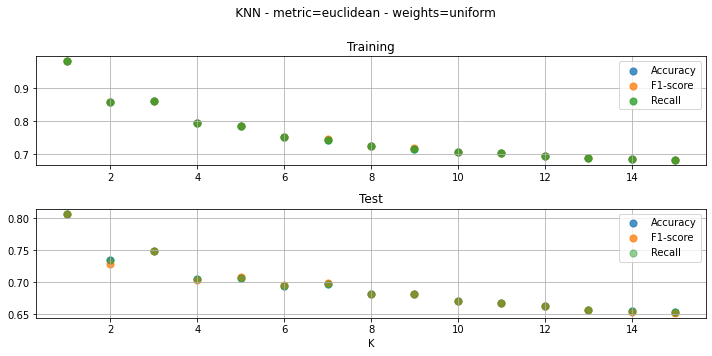

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=euclidean - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2190    0   16   15    3]
 [   0 1300   41    0    0]
 [   1    6 1589    3    3]
 [  18    0    6 1342    6]
 [  17    0    0    1 1114]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2224
           1       1.00      0.97      0.98      1341
           2       0.96      0.99      0.98      1602
           3       0.99      0.98      0.98      1372
           4       0.99      0.98      0.99      1132

    accuracy                           0.98      7671
   macro avg       0.98      0.98      0.98      7671
weighted avg       0.98      0.98      0.98      7671

Test:
[[487   7  25  26  10]
 [ 27 295  29   1   0]
 [ 42  37 302  17   5]
 [ 46   1  13 256  20]
 [ 41   1   3  19 208]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       555
           1       0.87      0.84      0.85       352
           2       0.81      0.75      0.78       403
           3       

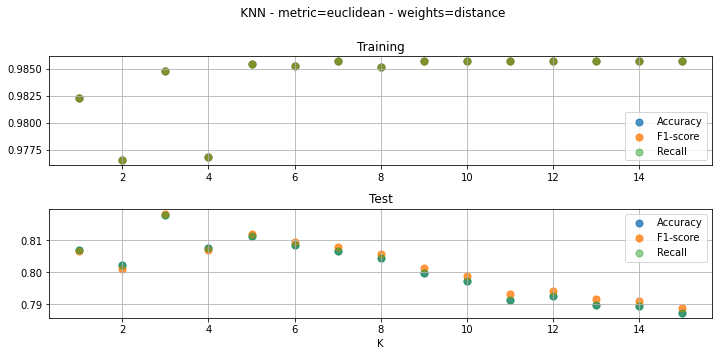

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=euclidean - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia coseno:

Pesos uniformes

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='cosine')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2150    0   16   55    3]
 [   0 1255   86    0    0]
 [   1  109 1486    3    3]
 [  20    1    6 1339    6]
 [  18    0    0    9 1105]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2224
           1       0.92      0.94      0.93      1341
           2       0.93      0.93      0.93      1602
           3       0.95      0.98      0.96      1372
           4       0.99      0.98      0.98      1132

    accuracy                           0.96      7671
   macro avg       0.96      0.96      0.96      7671
weighted avg       0.96      0.96      0.96      7671

Test:
[[477   7  28  33  10]
 [  9 306  34   3   0]
 [ 28  40 308  21   6]
 [ 37   1  15 260  23]
 [ 31   4   4  22 211]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       555
           1       0.85      0.87      0.86       352
           2       0.79      0.76      0.78       403
           3       

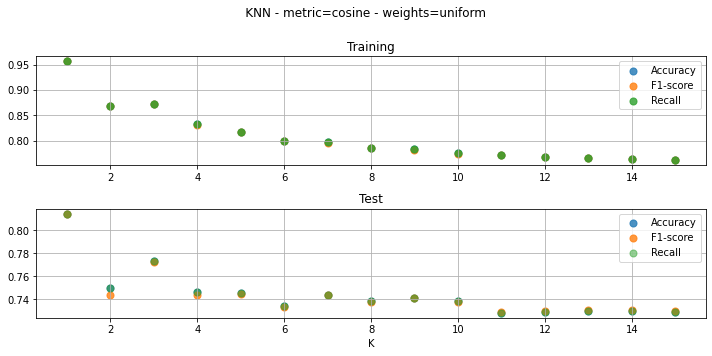

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=cosine - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.8, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

In [ ]:
 cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='cosine',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2150    0   16   55    3]
 [   0 1255   86    0    0]
 [   1  109 1486    3    3]
 [  20    1    6 1339    6]
 [  18    0    0    9 1105]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2224
           1       0.92      0.94      0.93      1341
           2       0.93      0.93      0.93      1602
           3       0.95      0.98      0.96      1372
           4       0.99      0.98      0.98      1132

    accuracy                           0.96      7671
   macro avg       0.96      0.96      0.96      7671
weighted avg       0.96      0.96      0.96      7671

Test:
[[477   7  28  33  10]
 [  9 306  34   3   0]
 [ 28  40 308  21   6]
 [ 37   1  15 260  23]
 [ 31   4   4  22 211]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       555
           1       0.85      0.87      0.86       352
           2       0.79      0.76      0.78       403
           3       

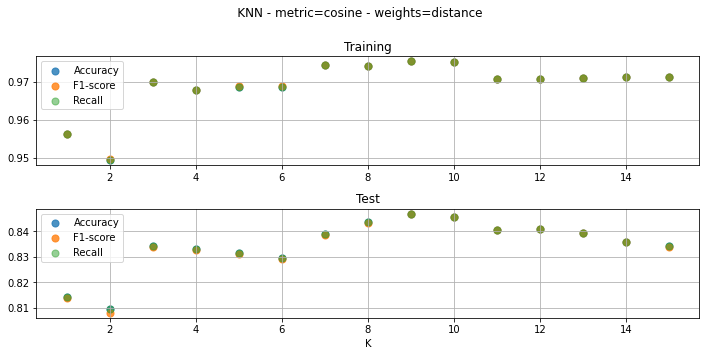

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=cosine - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia manhattan:

Pesos uniformes:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='manhattan')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2186    0   16   19    3]
 [   0 1255   86    0    0]
 [   1  109 1486    3    3]
 [  20    1    6 1339    6]
 [  18    0    0    9 1105]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2224
           1       0.92      0.94      0.93      1341
           2       0.93      0.93      0.93      1602
           3       0.98      0.98      0.98      1372
           4       0.99      0.98      0.98      1132

    accuracy                           0.96      7671
   macro avg       0.96      0.96      0.96      7671
weighted avg       0.96      0.96      0.96      7671

Test:
[[490   5  25  25  10]
 [ 43 282  25   1   1]
 [ 49  35 298  15   6]
 [ 62   1   8 248  17]
 [ 43   1   5  16 207]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       555
           1       0.87      0.80      0.83       352
           2       0.83      0.74      0.78       403
           3       

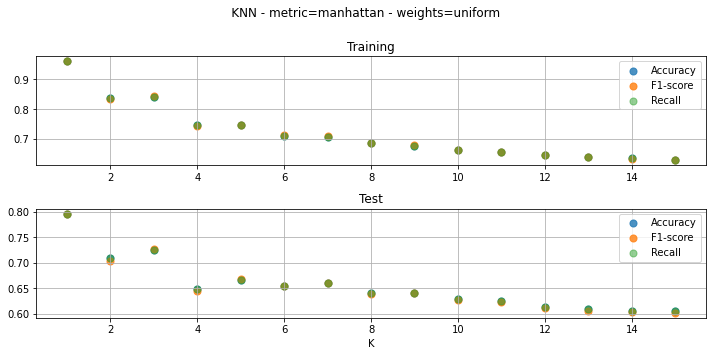

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=manhattan - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='manhattan',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2186    0   16   19    3]
 [   0 1255   86    0    0]
 [   1  109 1486    3    3]
 [  20    1    6 1339    6]
 [  18    0    0    9 1105]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2224
           1       0.92      0.94      0.93      1341
           2       0.93      0.93      0.93      1602
           3       0.98      0.98      0.98      1372
           4       0.99      0.98      0.98      1132

    accuracy                           0.96      7671
   macro avg       0.96      0.96      0.96      7671
weighted avg       0.96      0.96      0.96      7671

Test:
[[490   5  25  25  10]
 [ 43 282  25   1   1]
 [ 49  35 298  15   6]
 [ 62   1   8 248  17]
 [ 43   1   5  16 207]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       555
           1       0.87      0.80      0.83       352
           2       0.83      0.74      0.78       403
           3       

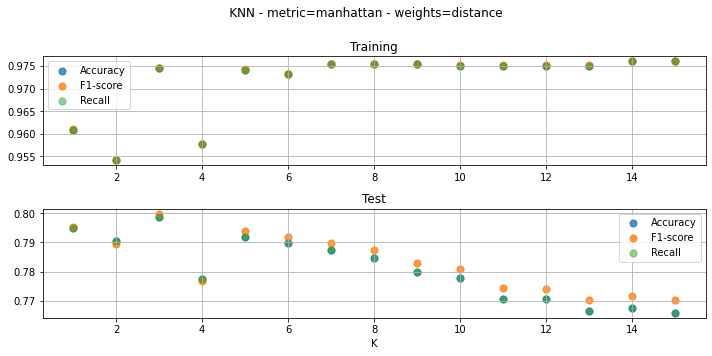

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=manhattan - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

# Distancia chebyshev:

Pesos uniformes:    


In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='chebyshev')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2186    0   16   19    3]
 [   0 1255   86    0    0]
 [   1  109 1486    3    3]
 [  20    1    6 1339    6]
 [  18    0    0    9 1105]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2224
           1       0.92      0.94      0.93      1341
           2       0.93      0.93      0.93      1602
           3       0.98      0.98      0.98      1372
           4       0.99      0.98      0.98      1132

    accuracy                           0.96      7671
   macro avg       0.96      0.96      0.96      7671
weighted avg       0.96      0.96      0.96      7671

Test:
[[462  14  30  28  21]
 [  6 303  29   6   8]
 [ 25  48 307  14   9]
 [ 38   9  15 246  28]
 [ 32   8   4  20 208]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       555
           1       0.79      0.86      0.83       352
           2       0.80      0.76      0.78       403
           3       

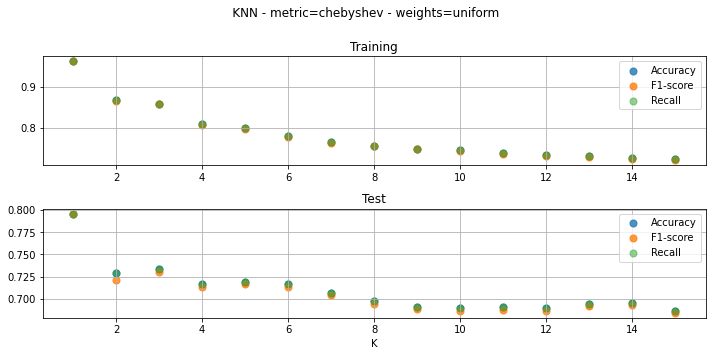

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=chebyshev - weights=uniform")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()

Pesos ponderados:

In [ ]:
cms_train=[]
cms_test=[]
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
recall_train = []
recall_test = []
reporte_train = []
reporte_test = []
ks = np.arange(1,16)
for k in ks:
    print("K:",k)
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,metric='chebyshev',weights='distance')
    knn.fit(X_train, y_train)

    predicciones_train=knn.predict(X_train)
    predicciones_test=knn.predict(X_test)

    cms_train.append(confusion_matrix(y_train,predicciones_train))
    cms_test.append(confusion_matrix(y_test,predicciones_test))
    accuracy_train.append(accuracy_score(y_train,predicciones_train))
    accuracy_test.append(accuracy_score(y_test,predicciones_test))
    f1_train.append(f1_score(y_train,predicciones_train,average='weighted'))
    f1_test.append(f1_score(y_test,predicciones_test,average='weighted'))
    recall_train.append(recall_score(y_train,predicciones_train,average='weighted'))
    recall_test.append(recall_score(y_test,predicciones_test,average='weighted'))
    reporte_train.append(precision_recall_fscore_support(y_train,predicciones_train))
    reporte_test.append(precision_recall_fscore_support(y_test,predicciones_test))
    
    print("Train:")
    print(cms_train[-1])
    print(classification_report(y_train,predicciones_train))

    print("Test:")
    print(cms_test[-1])
    print(classification_report(y_test,predicciones_test))
    print("-----------")

K: 1
Train:
[[2186    0   16   19    3]
 [   0 1255   86    0    0]
 [   1  109 1486    3    3]
 [  20    1    6 1339    6]
 [  18    0    0    9 1105]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2224
           1       0.92      0.94      0.93      1341
           2       0.93      0.93      0.93      1602
           3       0.98      0.98      0.98      1372
           4       0.99      0.98      0.98      1132

    accuracy                           0.96      7671
   macro avg       0.96      0.96      0.96      7671
weighted avg       0.96      0.96      0.96      7671

Test:
[[462  14  30  28  21]
 [  6 303  29   6   8]
 [ 25  48 307  14   9]
 [ 38   9  15 246  28]
 [ 32   8   4  20 208]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       555
           1       0.79      0.86      0.83       352
           2       0.80      0.76      0.78       403
           3       

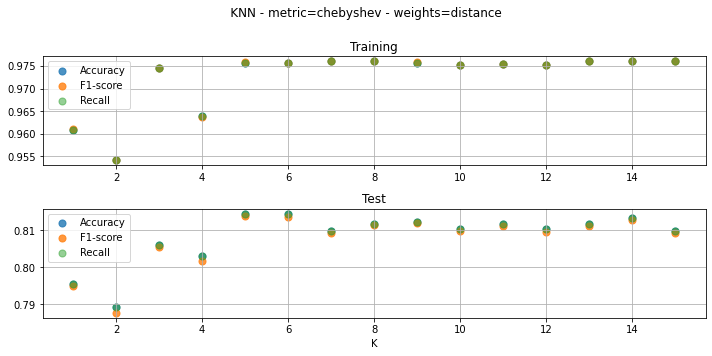

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(10,5),tight_layout=True)
fig.suptitle("     KNN - metric=chebyshev - weights=distance")

ax[0].scatter(ks,accuracy_train,s=50,alpha=0.8, label = 'Accuracy')
ax[0].scatter(ks,f1_train,s=50,alpha=0.8, label = 'F1-score')
ax[0].scatter(ks,recall_train,s=50,alpha=0.5, label = 'Recall')
ax[0].legend()
ax[0].grid()
ax[0].set_title('\n\nTraining')

ax[1].scatter(ks,accuracy_test,s=50,alpha=0.8, label = 'Accuracy')
ax[1].scatter(ks,f1_test,s=50,alpha=0.8, label = 'F1-score')
ax[1].scatter(ks,recall_test,s=50,alpha=0.5, label = 'Recall')
ax[1].legend()
ax[1].grid()
ax[1].set_title('Test')
ax[1].set_xlabel('K')

plt.show()